# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#check Nan data
nan_data = df[df.isna().any(axis=1)]
nan_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [4]:
print(len(df))
df = df.dropna()
print(len(df))
df=df.drop(['id'],axis=1)
df.head()

5110
4909


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Viusalize data

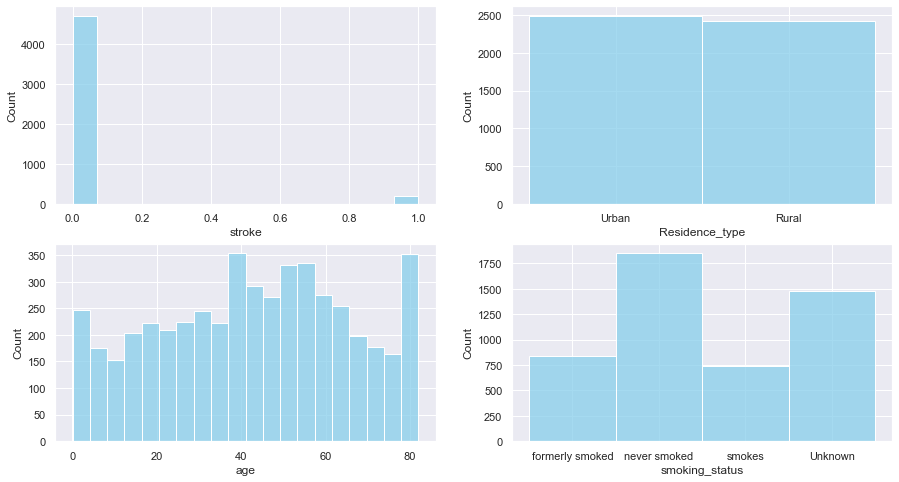

In [6]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

sns.histplot(data=df,x='stroke',ax=axes[0,0],color='skyblue')
sns.histplot(data=df,x='Residence_type',ax=axes[0,1],color='skyblue')

sns.histplot(data=df,x='age',ax=axes[1,0],color='skyblue')
sns.histplot(data=df,x='smoking_status',ax=axes[1,1],color='skyblue')

plt.show()

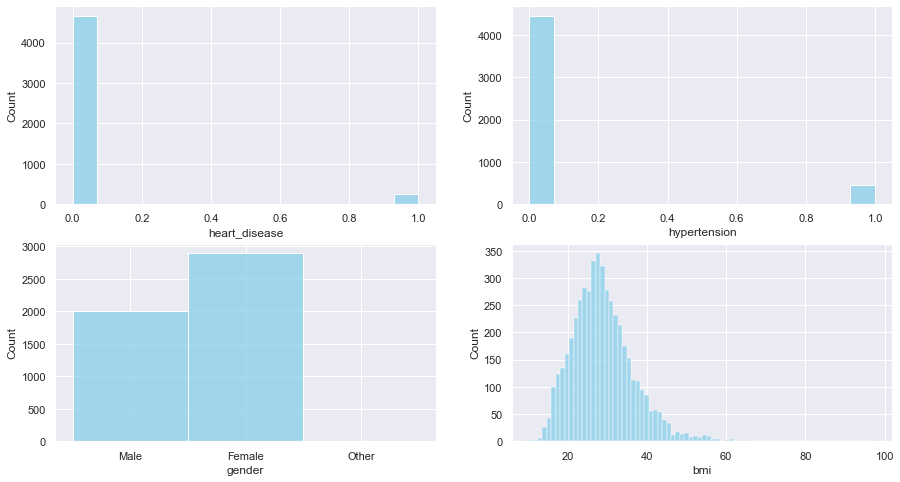

In [7]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

sns.histplot(data=df,x='heart_disease',ax=axes[0,0],color='skyblue')
sns.histplot(data=df,x='hypertension',ax=axes[0,1],color='skyblue')

sns.histplot(data=df,x='gender',ax=axes[1,0],color='skyblue')
sns.histplot(data=df,x='bmi',ax=axes[1,1],color='skyblue')

plt.show()

# Decision Tree

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
#encode data categorial
df['gender']=encoder.fit_transform(df['gender'].values)
df['ever_married']=encoder.fit_transform(df['ever_married'].values)
df['work_type']=encoder.fit_transform(df['work_type'].values)
df['Residence_type']=encoder.fit_transform(df['Residence_type'].values)
df['smoking_status']=encoder.fit_transform(df['smoking_status'].values)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int32  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int32  
 5   work_type          4909 non-null   int32  
 6   Residence_type     4909 non-null   int32  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int32  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 364.3 KB


In [11]:
df_train = df.drop(['stroke'],axis=1)
df_class=df['stroke']


# Fit Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [13]:
#split train and test data
xtrain,xtest,ytrain,ytest = train_test_split(df_train,df_class,test_size=0.2, random_state=100)
tree = DecisionTreeClassifier(random_state=100)
tree.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=100)

In [14]:
print(f'Accuracy : {tree.score(xtest,ytest)}')

Accuracy : 0.9338085539714868


# Save to .dot File 

In [15]:
from sklearn.tree import export_graphviz as exp
from IPython import display

In [16]:
dot_file=exp(tree,out_file='decision_tree.dot',class_names=['1','0'],feature_names=df_train.columns,filled=True)

Do in Terminal : dot -Tpng decision_tree.dot -o output.png  
Then open png file

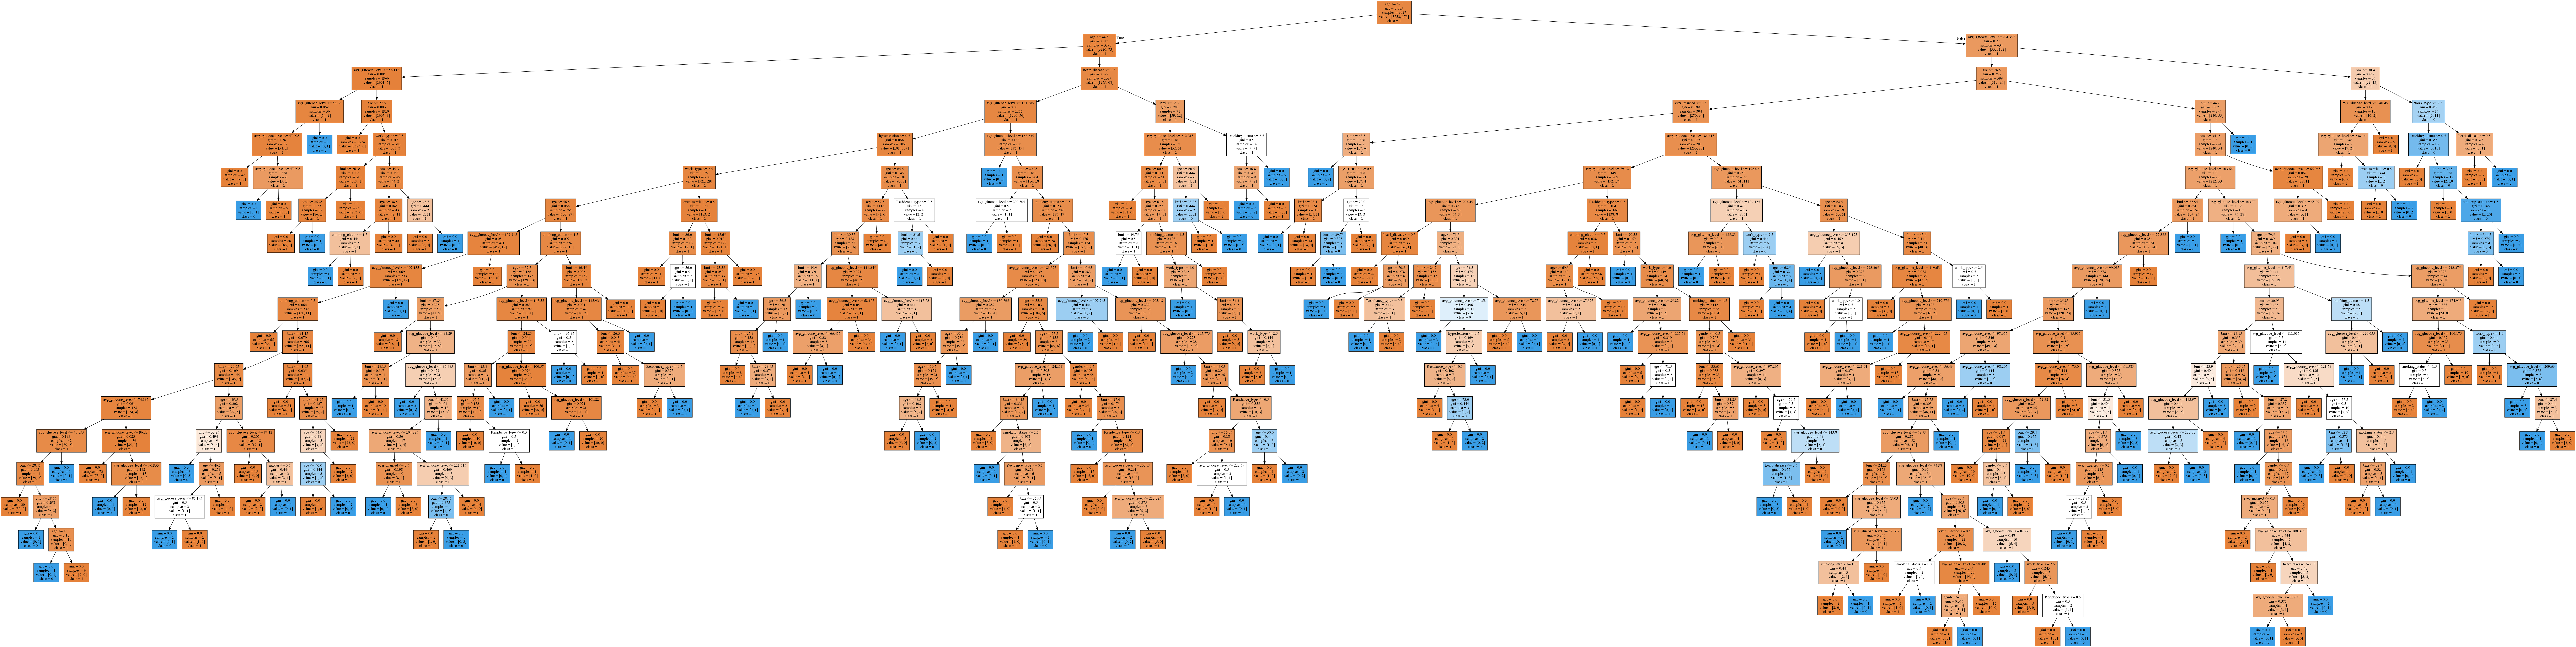

In [17]:
display.Image('output.png')